<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/Plotting_Company_ESG_Scores_with_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

symbol = 'PM'
warnings.filterwarnings('ignore')

In [ ]:
ticker = yf.Ticker(symbol)
df = pd.DataFrame(ticker.sustainability)
df.head()

,esgScores
maxAge,86400
totalEsg,26.55
environmentScore,5.63
socialScore,13.63
governanceScore,7.3


In [ ]:
ticker.sustainability

,esgScores
maxAge,86400
totalEsg,26.55
environmentScore,5.63
socialScore,13.63
governanceScore,7.3
ratingYear,2025
ratingMonth,2
highestControversy,3.0
peerCount,224
esgPerformance,AVG_PERF


In [ ]:
ticker_scores = ['totalEsg', 'environmentScore', 'socialScore',
                 'highestControversy','governanceScore']

ticker_score = {}
for score in ticker_scores:
  score_dict = df.T[score][0]
  ticker_score[score] = score_dict

In [ ]:
columns = ['peerEsgScorePerformance', 'peerGovernancePerformance',
       'peerSocialPerformance', 'peerEnvironmentPerformance',
       'peerHighestControversyPerformance']

peer_dicts = {}
for column in columns:
  score_dict = df.T[column][0]
  peer_dicts[column] = score_dict

In [ ]:
peer_score_df = pd.DataFrame(peer_dicts)
ticker_score_df = pd.DataFrame(ticker_score, index=[symbol])

In [ ]:
peer_score_df.head()

,peerEsgScorePerformance,peerGovernancePerformance,peerSocialPerformance,peerEnvironmentPerformance,peerHighestControversyPerformance
min,16.840000,1.670000,5.890000,4.990000,0.000000
avg,30.749152,5.087456,10.992456,12.077193,1.308036
max,49.940000,10.520000,21.390000,26.860000,4.000000


In [ ]:
ticker_score_df.head()

,totalEsg,environmentScore,socialScore,highestControversy,governanceScore
PM,26.55,5.63,13.63,3.0,7.3


In [ ]:
ticker_score_df = ticker_score_df.rename(columns={'totalEsg': 'peerEsgScorePerformance',
                                                  'environmentScore':'peerEnvironmentPerformance',
                                                  'socialScore':'peerSocialPerformance',
                                                  'highestControversy':'peerHighestControversyPerformance',
                                                  'governanceScore':'peerGovernancePerformance'})

combined_df = pd.concat([peer_score_df, ticker_score_df])

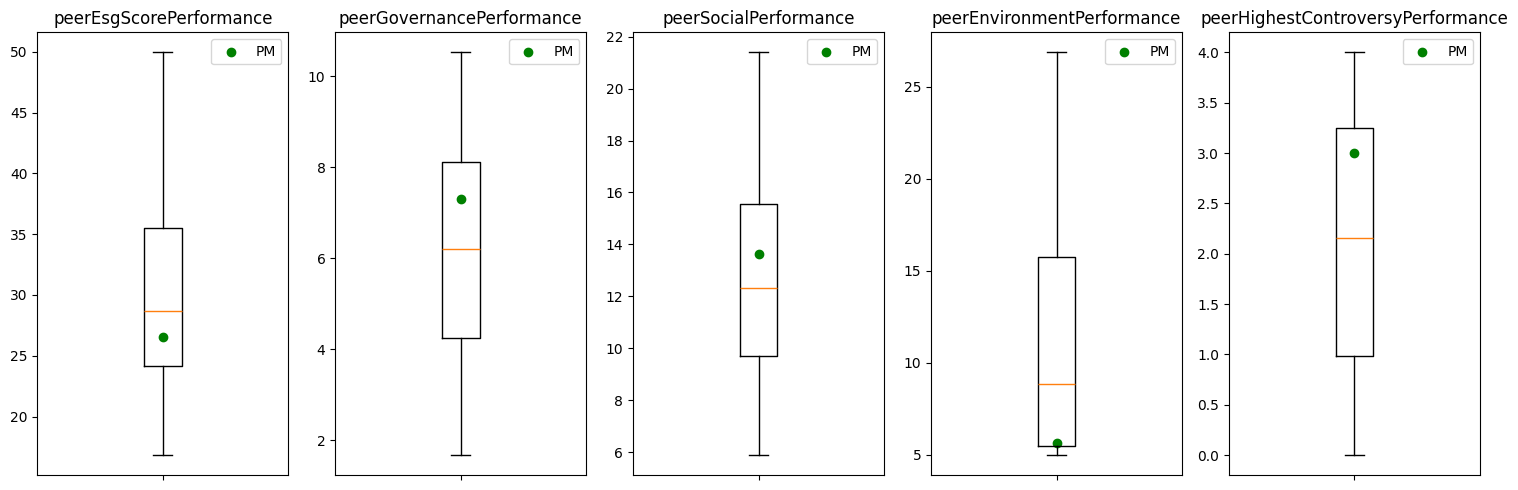

In [ ]:
num_cols = len(combined_df.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(15, 5))
for i, col in enumerate(combined_df.columns):
  # Extract data for the current column
  data = combined_df[col]

  # Create boxplot
  axes[i].boxplot(data, labels=[''])

  # Add G as point
  axes[i].scatter(1, combined_df.loc['PM',col], color='green', label='PM')

  axes[i].set_title(col)
  axes[i].legend()

plt.tight_layout()
plt.show()

#Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi